In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

import plotly.express as px
import plotly.graph_objects as go

from geopy.distance import geodesic as GD

import haversine as hs
from haversine import Unit


from functions import clean_meteor_data

In [82]:
MATEOR_STATION_PATH = '/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/meteo/300360-1-meteorologicos-estaciones.csv'
meteor_station_df = pd.read_csv(MATEOR_STATION_PATH,sep=";", encoding='latin-1')
meteor_station_df.head()

,CÓDIGO,CÓDIGO_CORTO,ESTACIÓN,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,VV (81),DV (82),T (83),...,COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,NUM_VIA,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD,Unnamed: 23
0,28079004.0,4.0,Plaza España,Plaza de España,"3°42'43.91""O","40°25'25.98""N",637.0,NaN,NaN,X,...,273600.0,PLAZA,DE,ESPAÑA,NaN,"439579,3291","4475049,263",-3.712257,40.423882,NaN
1,28079008.0,8.0,Escuelas Aguirre,Entre C/ Alcalá y C/ O Donell,"3°40'56.22""O","40°25'17.63""N",672.0,NaN,NaN,X,...,18900.0,CALLE,DE,ALCALA,NaN,"442117,2366","4474770,696",-3.682316,40.421553,NaN
2,28079016.0,16.0,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3°38'21.17""O","40°26'24.20""N",695.0,NaN,NaN,X,...,798700.0,CALLE,DEL,VIZCONDE DE LOS ASILOS,NaN,"445786,1729","4476796,019",-3.639242,40.440046,NaN
3,28079018.0,18.0,Farolillo,Calle Farolillo - C/Ervigio,"3°43'54.61""O","40°23'41.22""N",632.0,NaN,NaN,X,...,1903.0,CALLE,DEL,FAROLILLO,NaN,"437891,6961","4471832,769",-3.731836,40.394782,NaN
4,28079024.0,24.0,Casa de Campo,Casa de Campo (Terminal del Teleférico),"3°44'50.44""O","40°25'9.69""N",646.0,X,X,X,...,905219.0,CARRETERA,DEL,TELEFERICO,NaN,"436598,5637","4474571,618",-3.747345,40.419358,NaN


In [83]:
meteor_station_df.shape

(36, 24)

In [84]:
selected_meteorlogical_factors = ['VV (81)', 'T (83)', 'RS (88)', 'P (89)']

To return only the meteorlogical stations with all the selected columns

In [85]:
meteor_station_df[selected_meteorlogical_factors].notnull().all(axis=1)

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12     True
13     True
14     True
15    False
16     True
17     True
18     True
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
dtype: bool

In [24]:
meteor_station_df[meteor_station_df[selected_meteorlogical_factors].notnull().all(axis=1)]

,CÓDIGO,CÓDIGO_CORTO,ESTACIÓN,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,VV (81),DV (82),T (83),...,COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,NUM_VIA,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD,Unnamed: 23
4,28079024.0,24.0,Casa de Campo,Casa de Campo (Terminal del Teleférico),"3°44'50.44""O","40°25'9.69""N",646.0,X,X,X,...,905219.0,CARRETERA,DEL,TELEFERICO,NaN,"436598,5637","4474571,618",-3.747345,40.419358,NaN
9,28079054.0,54.0,Ensanche de Vallecas,Avda La Gavia / Avda. Las Suertes,"3°36'43.70""O","40°22'22.84""N",629.0,X,X,X,...,31000516.0,AVENIDA,DE,LA GAVIA,NaN,"448033,2263","4469339,044",-3.612139,40.373012,NaN
12,28079059.0,59.0,Juan Carlos I,Parque Juan Carlos I (frente oficinas mantenim...,"3º 36' 33""O",40º 27' 55''N,660.0,X,X,X,...,NaN,PARQUE,NaN,JUAN CARLOS I,NaN,"447744,4666","4479077,678",-3.616341,40.460726,NaN
13,28079102.0,102.0,J.M.D. Moratalaz,"C/ Fuente Carantona, 8",3º 38' 13'' O,40º 23' 55'' N,687.0,X,X,X,...,315060.0,CALLE,DE LA,FUENTE CARRANTONA,8,"445947,89","4472195,4",-3.635637,40.399793,NaN
14,28079103.0,103.0,J.M.D. Villaverde,"C/ Arroyo Bueno, 53",3º 42' 39'' O,40º 20' 58'' N,594.0,X,X,X,...,74200.0,CALLE,DEL,ARROYO BUENO,53,"439633,65","4466785,76",-3.709525,40.350628,NaN
16,28079106.0,106.0,Centro Mpal. De Acústica,Autovía M-30 Km. 21.700,3º 44' 24'' O,40º 26' 32'' N,587.0,X,X,X,...,31001349.0,AUTOVÍA,NaN,M-30,"21,7","437130,68","4476974,19",-3.740000,40.442222,NaN
17,28079107.0,107.0,J.M.D. Hortaleza,"Ctra. de Canillas, 2",3º 39' 24'' O,40º 27' 46'' N,715.0,X,X,X,...,133455.0,CARRETERA,DE,CANILLAS,2,"444215,2","4479200,02",-3.656667,40.462778,NaN
18,28079108.0,108.0,Peñagrande,C.D.M. Peñagrande,"3°43'4.37""O","40°28'35.88""N",660.0,X,X,X,...,514425.0,AVENIDA,DE,MONFORTE DE LEMOS,184,"439037,69","4480778,49",-3.717881,40.476633,NaN


In [25]:
meteor_station_df[meteor_station_df[selected_meteorlogical_factors].notnull().all(axis=1)].ESTACIÓN

4                Casa de Campo
9         Ensanche de Vallecas
12               Juan Carlos I
13            J.M.D. Moratalaz
14           J.M.D. Villaverde
16    Centro Mpal. De Acústica
17            J.M.D. Hortaleza
18                  Peñagrande
Name: ESTACIÓN, dtype: object

In [86]:
selected_meteor_stations_df = meteor_station_df[meteor_station_df[selected_meteorlogical_factors].notnull().all(axis=1)]
selected_meteor_stations_df.head()

,CÓDIGO,CÓDIGO_CORTO,ESTACIÓN,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,VV (81),DV (82),T (83),...,COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,NUM_VIA,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD,Unnamed: 23
4,28079024.0,24.0,Casa de Campo,Casa de Campo (Terminal del Teleférico),"3°44'50.44""O","40°25'9.69""N",646.0,X,X,X,...,905219.0,CARRETERA,DEL,TELEFERICO,NaN,"436598,5637","4474571,618",-3.747345,40.419358,NaN
9,28079054.0,54.0,Ensanche de Vallecas,Avda La Gavia / Avda. Las Suertes,"3°36'43.70""O","40°22'22.84""N",629.0,X,X,X,...,31000516.0,AVENIDA,DE,LA GAVIA,NaN,"448033,2263","4469339,044",-3.612139,40.373012,NaN
12,28079059.0,59.0,Juan Carlos I,Parque Juan Carlos I (frente oficinas mantenim...,"3º 36' 33""O",40º 27' 55''N,660.0,X,X,X,...,NaN,PARQUE,NaN,JUAN CARLOS I,NaN,"447744,4666","4479077,678",-3.616341,40.460726,NaN
13,28079102.0,102.0,J.M.D. Moratalaz,"C/ Fuente Carantona, 8",3º 38' 13'' O,40º 23' 55'' N,687.0,X,X,X,...,315060.0,CALLE,DE LA,FUENTE CARRANTONA,8,"445947,89","4472195,4",-3.635637,40.399793,NaN
14,28079103.0,103.0,J.M.D. Villaverde,"C/ Arroyo Bueno, 53",3º 42' 39'' O,40º 20' 58'' N,594.0,X,X,X,...,74200.0,CALLE,DEL,ARROYO BUENO,53,"439633,65","4466785,76",-3.709525,40.350628,NaN


In [87]:
fig = px.scatter_mapbox(selected_meteor_stations_df,
                     lat='LATITUD',lon='LONGITUD',
                     hover_name="ESTACIÓN",
                     zoom=10, 
                     height=800,
                     width=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_traces(marker={'size': 15})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()



There are 7 meteorological stations that fulfill the criteria

---

In [89]:
AIR_STATION_PATH = '/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/air/212629-1-estaciones-control-aire.csv'
air_station_df = pd.read_csv(AIR_STATION_PATH,sep=";")
air_station_df.head()

,CODIGO,CODIGO_CORTO,ESTACION,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,COD_TIPO,NOM_TIPO,NO2,...,BTX,COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,Fecha alta,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD
0,28079004,4,Plaza de España,Plaza de España,"3°42'43.91""O","40°25'25.98""N",637,UT,Urbana tráfico,X,...,NaN,273600,PLAZA,DE,ESPAÑA,01/12/1998,"439579,3291","4475049,263",-3.712257,40.423882
1,28079008,8,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3°40'56.22""O","40°25'17.63""N",672,UT,Urbana tráfico,X,...,X,18900,CALLE,DE,ALCALA,01/12/1998,"442117,2366","4474770,696",-3.682316,40.421553
2,28079011,11,Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,"3°40'38.50""O","40°27'5.29""N",708,UT,Urbana tráfico,X,...,X,610450,CALLE,DEL,PRINCIPE DE VERGARA,01/12/1998,"442564,0457","4478088,595",-3.677349,40.451473
3,28079016,16,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3°38'21.17""O","40°26'24.20""N",695,UF,Urbana fondo,X,...,NaN,798700,CALLE,DEL,VIZCONDE DE LOS ASILOS,01/12/1998,"445786,1729","4476796,019",-3.639242,40.440046
4,28079017,17,Villaverde,C/ Juan Peñalver,"3°42'47.89""O","40°20'49.74""N",601,UF,Urbana fondo,X,...,NaN,417200,CALLE,DE,JUAN PEÑALVER,01/12/1998,"439420,7015","4466532,455",-3.713317,40.347147


In [90]:
air_station_df.columns

Index(['CODIGO', 'CODIGO_CORTO', 'ESTACION', 'DIRECCION', 'LONGITUD_ETRS89',
       'LATITUD_ETRS89', 'ALTITUD', 'COD_TIPO', 'NOM_TIPO', 'NO2', 'SO2', 'CO',
       'PM10', 'PM2_5', 'O3', 'BTX', 'COD_VIA', 'VIA_CLASE', 'VIA_PAR',
       'VIA_NOMBRE', 'Fecha alta', 'COORDENADA_X_ETRS89',
       'COORDENADA_Y_ETRS89', 'LONGITUD', 'LATITUD'],
      dtype='object')

In [91]:
selected_air_factors = ['NO2', 'PM10', 'PM2_5']

In [92]:
air_station_df[selected_air_factors]

,NO2,PM10,PM2_5
0,X,NaN,NaN
1,X,X,X
2,X,NaN,NaN
3,X,NaN,NaN
4,X,NaN,NaN
5,X,X,NaN
6,X,X,X
7,X,NaN,NaN
8,X,NaN,NaN
9,X,X,NaN


#### After checking each gas, it turns out that the station 57 does not have 'NOX' sensor

In [93]:
sliced_air_station_df = air_station_df[air_station_df[selected_air_factors].notnull().all(axis=1)]
sliced_air_station_df =sliced_air_station_df[sliced_air_station_df.CODIGO_CORTO != 57]

In [94]:
fig = px.scatter_mapbox(sliced_air_station_df,
                     lat='LATITUD',lon='LONGITUD',
                     hover_name="ESTACION",
                     zoom=10, 
                     height=400,
                     width=600,
                     color = 'NOM_TIPO')

fig.update_layout(mapbox_style="stamen-terrain")
fig.update_traces(marker={'size': 10})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [71]:
selected_air_stations = [24,47, 50]
selected_air_stations_df = air_station_df[air_station_df['CODIGO_CORTO'].isin(selected_air_stations)]
selected_air_stations_df.head()

,CODIGO,CODIGO_CORTO,ESTACION,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,COD_TIPO,NOM_TIPO,NO2,...,BTX,COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,Fecha alta,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD
6,28079024,24,Casa de Campo,Casa de Campo (Terminal del Teleférico),"3°44'50.44""O","40°25'9.69""N",646,S,Suburbana,X,...,X,905219,CARRETERA,DEL,TELEFERICO,01/12/1998,"436598,5637","4474571,618",-3.747345,40.419358
13,28079047,47,Méndez Álvaro,C/ Juan de Mariana / Plaza Amanecer Méndez Álvaro,"3°41'12.57""O","40°23'53.17""N",600,UF,Urbana fondo,X,...,NaN,414800,CALLE,DE,JUAN DE MARIANA,21/12/2009,"441715,4303","4472170,249",-3.686814,40.398099
16,28079050,50,Plaza Castilla,Plaza Castilla (Canal),"3°41'19.48""O","40°27'56.10""N",728,UT,Urbana tráfico,X,...,NaN,154500,PLAZA,DE,CASTILLA,01/02/2010,"441609,9474","4479662,346",-3.688745,40.465584


In [96]:
geometry = [Point(xy) for xy in zip(selected_air_stations_df['LONGITUD'], selected_air_stations_df['LATITUD'])]
gdf = GeoDataFrame(selected_air_stations_df, geometry=geometry) 

In [97]:
fig = px.scatter_mapbox(selected_air_stations_df,
                     lat='LATITUD',lon='LONGITUD',
                     hover_name="ESTACION",
                     custom_data=["ESTACION", "VIA_NOMBRE"],
                     zoom=10, 
                     height=500,
                     width=800,
                     color = 'NOM_TIPO')

fig.update_layout(mapbox_style="stamen-terrain")
fig.update_traces(marker={'size': 10})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [98]:
from pydoc import visiblename


fig = px.scatter_mapbox(selected_air_stations_df,
                     lat='LATITUD',lon='LONGITUD',
                     hover_name="ESTACION",
                     custom_data=["ESTACION", "VIA_NOMBRE"],
                     zoom=10, 
                     height=800,
                     width=800,
                     color = 'NOM_TIPO')
fig.update_layout(mapbox_style="open-street-map")
fig.update_traces(marker={'size': 15})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## MERGE 2 DATAFRAME FOR PLOTTING

In [99]:
selected_air_stations_df['station_type'] = 'air station'
selected_meteor_stations_df['station_type'] = 'meteorlogical station'

/var/folders/tl/rdcj6pp130g_pdpr6thc58qr0000gn/T/ipykernel_25930/4204272646.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
selected_meteor_stations_df = selected_meteor_stations_df.rename(columns={"ESTACIÓN" : "ESTACION"})

In [101]:
combined_df = pd.concat([selected_air_stations_df, selected_meteor_stations_df])

In [102]:
fig = px.scatter_mapbox(combined_df,
                     lat='LATITUD',lon='LONGITUD',
                     hover_name="ESTACION",
                     zoom=10, 
                     height=500,
                     width=1000,
                     color = "station_type",
                     )
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_traces(marker={'size': 15})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [114]:
[0,1,2,3,4,6,9]

6     24.0
13    47.0
16    50.0
4      NaN
9      NaN
12     NaN
13     NaN
14     NaN
16     NaN
17     NaN
18     NaN
Name: CODIGO_CORTO, dtype: float64

In [132]:
combined_df['final'] = 5
combined_df.iloc[[0,1,2],  :]['final'] = 'Air quality station'
combined_df.iloc[[3,6,9], :]['final'] =  'Selected Meteorogical'            
combined_df.iloc[[4,5,7,8,10], :]['final']   = 'not selected'

/var/folders/tl/rdcj6pp130g_pdpr6thc58qr0000gn/T/ipykernel_25930/4120452713.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/tl/rdcj6pp130g_pdpr6thc58qr0000gn/T/ipykernel_25930/4120452713.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/tl/rdcj6pp130g_pdpr6thc58qr0000gn/T/ipykernel_25930/4120452713.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [133]:
combined_df

,CODIGO,CODIGO_CORTO,ESTACION,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,COD_TIPO,NOM_TIPO,NO2,...,VV (81),DV (82),T (83),HR (86),PB (87),RS (88),P (89),NUM_VIA,Unnamed: 23,final
6,28079024.0,24.0,Casa de Campo,Casa de Campo (Terminal del Teleférico),"3°44'50.44""O","40°25'9.69""N",646.0,S,Suburbana,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
13,28079047.0,47.0,Méndez Álvaro,C/ Juan de Mariana / Plaza Amanecer Méndez Álvaro,"3°41'12.57""O","40°23'53.17""N",600.0,UF,Urbana fondo,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
16,28079050.0,50.0,Plaza Castilla,Plaza Castilla (Canal),"3°41'19.48""O","40°27'56.10""N",728.0,UT,Urbana tráfico,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,NaN,NaN,Casa de Campo,Casa de Campo (Terminal del Teleférico),"3°44'50.44""O","40°25'9.69""N",646.0,NaN,NaN,NaN,...,X,X,X,X,X,X,X,NaN,NaN,5
9,NaN,NaN,Ensanche de Vallecas,Avda La Gavia / Avda. Las Suertes,"3°36'43.70""O","40°22'22.84""N",629.0,NaN,NaN,NaN,...,X,X,X,X,NaN,X,X,NaN,NaN,5
12,NaN,NaN,Juan Carlos I,Parque Juan Carlos I (frente oficinas mantenim...,"3º 36' 33""O",40º 27' 55''N,660.0,NaN,NaN,NaN,...,X,X,X,X,X,X,X,NaN,NaN,5
13,NaN,NaN,J.M.D. Moratalaz,"C/ Fuente Carantona, 8",3º 38' 13'' O,40º 23' 55'' N,687.0,NaN,NaN,NaN,...,X,X,X,X,X,X,X,8,NaN,5
14,NaN,NaN,J.M.D. Villaverde,"C/ Arroyo Bueno, 53",3º 42' 39'' O,40º 20' 58'' N,594.0,NaN,NaN,NaN,...,X,X,X,X,X,X,X,53,NaN,5
16,NaN,NaN,Centro Mpal. De Acústica,Autovía M-30 Km. 21.700,3º 44' 24'' O,40º 26' 32'' N,587.0,NaN,NaN,NaN,...,X,X,X,X,X,X,X,"21,7",NaN,5
17,NaN,NaN,J.M.D. Hortaleza,"Ctra. de Canillas, 2",3º 39' 24'' O,40º 27' 46'' N,715.0,NaN,NaN,NaN,...,X,X,X,X,X,X,X,2,NaN,5


In [124]:
combined_df.shape

(11, 38)

In [42]:
# combined_df.to_csv('test.csv')

---

### COMPUTE DISTANCE BETWEEN METEORLOGICAL STATIONS AND AIR STATIONS

In [103]:
a =selected_meteor_stations_df.iloc[0]['LATITUD'] ,selected_meteor_stations_df.iloc[0]['LONGITUD']
b= selected_meteor_stations_df.iloc[1]['LATITUD'] ,selected_meteor_stations_df.iloc[0]['LONGITUD']

In [104]:
output_matrix = np.zeros((8,3))

for meteo_station_idx in range(selected_meteor_stations_df.shape[0]):
    for air_station_idx in range(selected_air_stations_df.shape[0]):
        geo_a = selected_meteor_stations_df.iloc[meteo_station_idx]['LATITUD'] ,selected_meteor_stations_df.iloc[meteo_station_idx]['LONGITUD'] 
        geo_b = selected_air_stations_df.iloc[air_station_idx]['LATITUD'] ,selected_air_stations_df.iloc[air_station_idx]['LONGITUD'] 
        
        distance = GD(geo_a, geo_b).km
        
        output_matrix[meteo_station_idx][air_station_idx] = distance
        
        print(f"{meteo_station_idx}, {air_station_idx } : {distance} ")

0, 0 : 0.0 
0, 1 : 5.654335192007132 
0, 2 : 7.146030444415046 
1, 0 : 12.579549016551976 
1, 1 : 6.925689763291797 
1, 2 : 12.162915677942072 
2, 0 : 12.02661758398815 
2, 1 : 9.171846102367137 
2, 2 : 6.164552879902848 
3, 0 : 9.727599966420742 
3, 1 : 4.348709919521408 
3, 2 : 8.583688753015908 
4, 0 : 8.280028543964866 
4, 1 : 5.613079336310909 
4, 2 : 12.886321634959016 
5, 0 : 2.6142889124497595 
5, 1 : 6.661823332463855 
5, 2 : 5.062890301192097 
6, 0 : 9.079273412277159 
6, 1 : 7.624105904858359 
6, 2 : 2.738403520435202 
7, 0 : 6.833585370780918 
7, 1 : 9.110346249206223 
7, 2 : 2.7587219718718203 


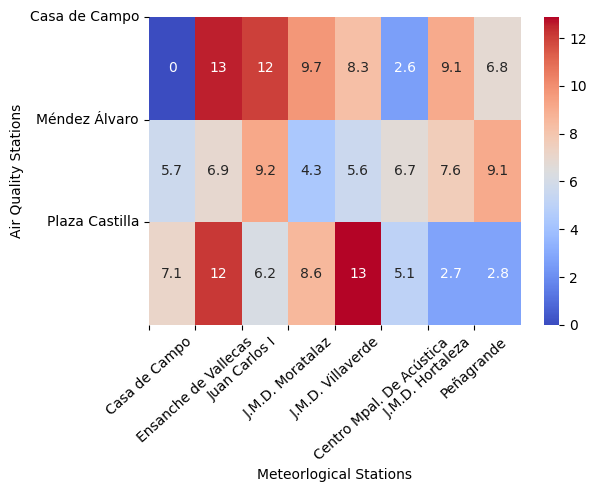

In [112]:
plt.figure(figsize = (6,4))
sns.heatmap(output_matrix.T, annot = True, cmap = 'coolwarm')
plt.xticks(ticks=np.arange(8), labels = list(selected_meteor_stations_df['ESTACION']), rotation = 42 )
plt.yticks(ticks=np.arange(3), labels = list(selected_air_stations_df['ESTACION']), rotation = 0)
plt.xlabel("Meteorlogical Stations")
plt.ylabel("Air Quality Stations")
plt.show()

In [128]:
combined_df

,CODIGO,CODIGO_CORTO,ESTACION,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,COD_TIPO,NOM_TIPO,NO2,...,CÓDIGO_CORTO,VV (81),DV (82),T (83),HR (86),PB (87),RS (88),P (89),NUM_VIA,Unnamed: 23
6,28079024.0,24.0,Casa de Campo,Casa de Campo (Terminal del Teleférico),"3°44'50.44""O","40°25'9.69""N",646.0,S,Suburbana,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,28079047.0,47.0,Méndez Álvaro,C/ Juan de Mariana / Plaza Amanecer Méndez Álvaro,"3°41'12.57""O","40°23'53.17""N",600.0,UF,Urbana fondo,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,28079050.0,50.0,Plaza Castilla,Plaza Castilla (Canal),"3°41'19.48""O","40°27'56.10""N",728.0,UT,Urbana tráfico,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Casa de Campo,Casa de Campo (Terminal del Teleférico),"3°44'50.44""O","40°25'9.69""N",646.0,NaN,NaN,NaN,...,24.0,X,X,X,X,X,X,X,NaN,NaN
9,NaN,NaN,Ensanche de Vallecas,Avda La Gavia / Avda. Las Suertes,"3°36'43.70""O","40°22'22.84""N",629.0,NaN,NaN,NaN,...,54.0,X,X,X,X,NaN,X,X,NaN,NaN
12,NaN,NaN,Juan Carlos I,Parque Juan Carlos I (frente oficinas mantenim...,"3º 36' 33""O",40º 27' 55''N,660.0,NaN,NaN,NaN,...,59.0,X,X,X,X,X,X,X,NaN,NaN
13,NaN,NaN,J.M.D. Moratalaz,"C/ Fuente Carantona, 8",3º 38' 13'' O,40º 23' 55'' N,687.0,NaN,NaN,NaN,...,102.0,X,X,X,X,X,X,X,8,NaN
14,NaN,NaN,J.M.D. Villaverde,"C/ Arroyo Bueno, 53",3º 42' 39'' O,40º 20' 58'' N,594.0,NaN,NaN,NaN,...,103.0,X,X,X,X,X,X,X,53,NaN
16,NaN,NaN,Centro Mpal. De Acústica,Autovía M-30 Km. 21.700,3º 44' 24'' O,40º 26' 32'' N,587.0,NaN,NaN,NaN,...,106.0,X,X,X,X,X,X,X,"21,7",NaN
17,NaN,NaN,J.M.D. Hortaleza,"Ctra. de Canillas, 2",3º 39' 24'' O,40º 27' 46'' N,715.0,NaN,NaN,NaN,...,107.0,X,X,X,X,X,X,X,2,NaN


In [127]:
fig = px.scatter_mapbox(combined_df,
                     lat='LATITUD',lon='LONGITUD',
                     hover_name="ESTACION",
                     zoom=10, 
                     height=500,
                     width=1000,
                     color = "final",
                     )
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_traces(marker={'size': 15})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['CODIGO', 'CODIGO_CORTO', 'ESTACION', 'DIRECCION', 'LONGITUD_ETRS89', 'LATITUD_ETRS89', 'ALTITUD', 'COD_TIPO', 'NOM_TIPO', 'NO2', 'SO2', 'CO', 'PM10', 'PM2_5', 'O3', 'BTX', 'COD_VIA', 'VIA_CLASE', 'VIA_PAR', 'VIA_NOMBRE', 'Fecha alta', 'COORDENADA_X_ETRS89', 'COORDENADA_Y_ETRS89', 'LONGITUD', 'LATITUD', 'geometry', 'station_type', 'CÓDIGO', 'CÓDIGO_CORTO', 'VV (81)', 'DV (82)', 'T (83)', 'HR (86)', 'PB (87)', 'RS (88)', 'P (89)', 'NUM_VIA', 'Unnamed: 23'] but received: final

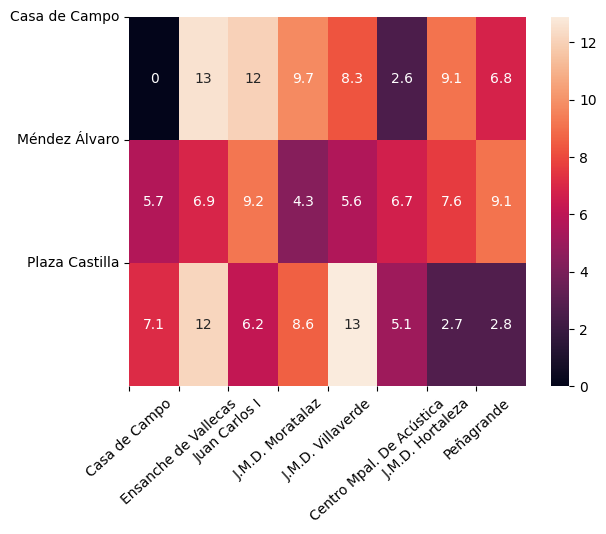

In [46]:
sns.heatmap(output_matrix.T, annot = True)
plt.xticks(ticks=np.arange(8), labels = list(selected_meteor_stations_df['ESTACION']), rotation = 42 )
plt.yticks(ticks=np.arange(3), labels = list(selected_air_stations_df['ESTACION']), rotation = 0)
plt.show()

## Summary
AIR STATION          ---     METEO CLOSEST STATION
Case de campo(24)    ---     Case de campo(24)
Mendez Alvaro(47)    ---     JMD Moratalaz(102)
Plaza Castilla(50)   ---     JMD Hortaleza(107)

# 

In [47]:
selected_meteor_station_index = [24,102,107]
selected_meteor_stations_df[selected_meteor_stations_df['CÓDIGO_CORTO'].isin(selected_meteor_station_index)]

,CÓDIGO,CÓDIGO_CORTO,ESTACION,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,VV (81),DV (82),T (83),...,VIA_CLASE,VIA_PAR,VIA_NOMBRE,NUM_VIA,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD,Unnamed: 23,station_type
4,28079024.0,24.0,Casa de Campo,Casa de Campo (Terminal del Teleférico),"3°44'50.44""O","40°25'9.69""N",646.0,X,X,X,...,CARRETERA,DEL,TELEFERICO,NaN,"436598,5637","4474571,618",-3.747345,40.419358,NaN,meteorlogical station
13,28079102.0,102.0,J.M.D. Moratalaz,"C/ Fuente Carantona, 8",3º 38' 13'' O,40º 23' 55'' N,687.0,X,X,X,...,CALLE,DE LA,FUENTE CARRANTONA,8,"445947,89","4472195,4",-3.635637,40.399793,NaN,meteorlogical station
17,28079107.0,107.0,J.M.D. Hortaleza,"Ctra. de Canillas, 2",3º 39' 24'' O,40º 27' 46'' N,715.0,X,X,X,...,CARRETERA,DE,CANILLAS,2,"444215,2","4479200,02",-3.656667,40.462778,NaN,meteorlogical station


---

## 

## create combined df for selected meteor stations and meteor index

df = pd.read_csv*()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

import plotly.express as px
import plotly.graph_objects as go

from geopy.distance import geodesic as GD

import haversine as hs
from haversine import Unit

In [70]:
df = pd.read_csv("/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/meteo/2019meteorologicos-diarios.csv",
                 sep = ';')
df.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,102,81,28079102_81_98,2019,1,0.66,V,1.16,...,2.57,V,2.93,V,3.23,V,3.18,V,4.72,V
1,28,79,102,81,28079102_81_98,2019,2,4.32,V,2.98,...,1.36,V,0.97,V,0.00,N,0.00,N,0.00,N
2,28,79,102,81,28079102_81_98,2019,3,1.57,V,1.13,...,1.48,V,1.69,V,2.89,V,1.99,V,1.72,V
3,28,79,102,81,28079102_81_98,2019,4,1.32,V,1.21,...,1.00,V,1.82,V,1.97,V,1.84,V,0.00,N
4,28,79,102,81,28079102_81_98,2019,5,2.06,V,2.21,...,1.77,V,3.32,V,3.76,V,3.04,V,1.89,V


In [81]:
df[(df["MES"] == 11)&  (df["MAGNITUD"] == 83) &  (df["ESTACION"] == 24)].values

array([[28, 79, 24, 83, '28079024_83_98', 2019, 11, 16.4, 'V', 15.3, 'V',
        13.8, 'V', 12.9, 'V', 9.9, 'V', 10.4, 'V', 9.5, 'V', 7.7, 'V',
        7.4, 'V', 7.1, 'V', 7.9, 'V', 7.9, 'V', 11.8, 'V', 7.2, 'N',
        -29.6, 'N', -28.8, 'N', -29.0, 'N', -26.5, 'N', -20.4, 'N', 6.5,
        'N', 6.8, 'V', 8.6, 'V', 8.7, 'V', 8.6, 'V', 11.0, 'V', 11.2,
        'V', 10.6, 'V', 9.6, 'V', 12.3, 'V', 11.7, 'V', 0.0, 'N']],
      dtype=object)

In [118]:

selected_meteor_station_index = [24,102,107]
selected_meteorlogical_factors = [81,83,88,89]


meteor_dict = {
    'station_name' : {24 : 'Casa de Campo',
               102: "J.M.D. Moratalaz",
               107: "J.M.D. Hortaleza"}
    ,

    'meteor_factor': {81: 'Wind Speed',
                 83: 'Temperature',
                 88: 'Solar Radiation',
                 89: 'Precipitation'
                 }
}

def clean_meteor_data(filename):
        
        
        
    V_list= ["V0"+str(i) for i in range(1, 10)]  + ["V1"+str(i) for i in range(0, 10)] + ["V2"+str(i) for i in range(0, 10)] +['V30', "V31"]
    print('Cleaning METEOR data...')
    df = pd.read_csv(filename, sep=';')
    df = df[(df['ESTACION'].isin(selected_meteor_station_index)) &
            (df['MAGNITUD'].isin(selected_meteorlogical_factors))]

    
    df = pd.melt(df, id_vars=['ESTACION', 'ANO', 'MES', 'MAGNITUD'], value_vars=V_list)
    
    return df

In [121]:



def edit_month_to_two_digit(input):
    if len(str(input)) < 2:
        new_input = str(0) + str(input)
    else:
        new_input = input
    
    return new_input

def clean_meteor_data(filename):
    
    print('Cleaning METEOR data...')
    df = pd.read_csv(filename, sep=';')
    df = df[(df['ESTACION'].isin(selected_meteor_station_index)) &
            (df['MAGNITUD'].isin(selected_meteorlogical_factors))]

    D_list= ["D0"+str(i) for i in range(1, 10)]  + ["D1"+str(i) for i in range(0, 10)] + ["D2"+str(i) for i in range(0, 10)] +['D30', "D31"]
    V_list= ["V0"+str(i) for i in range(1, 10)]  + ["V1"+str(i) for i in range(0, 10)] + ["V2"+str(i) for i in range(0, 10)] +['V30', "V31"]


    v_df = pd.melt(df, id_vars=['ESTACION', 'ANO', 'MES', 'MAGNITUD'], value_vars=V_list, value_name= 'sensor_valid')
    df = pd.melt(df, id_vars=['ESTACION', 'ANO', 'MES', 'MAGNITUD'], value_vars=D_list)
    
    df['sensor_valid'] = v_df['sensor_valid']
    invalid_sensor_index = df[df['sensor_valid'] != 'V'].index
    
    date_constraint_df = df[ (df['MES'] == 2) & (df['variable'].isin(['D29','D30','D31'])) |
    ((df['MES'] == 4) & (df['variable'].isin(['D31'])) )  |
    ((df['MES'] == 6) & (df['variable'].isin(['D31'])) )  |
    ((df['MES'] == 9) & (df['variable'].isin(['D31'])) )  |
    ((df['MES'] == 11) & (df['variable'].isin(['D31'])) ) 
    ]  
    
    # # assert date_constraint_df['value'].sum() == 0
    
    to_drop_index = invalid_sensor_index.union(date_constraint_df.index)
    print(f'Dropping: {len(invalid_sensor_index)} rows')
    df = df.drop(to_drop_index)
    df['meteor_factor'] = df['MAGNITUD'].apply(lambda x : meteor_dict['meteor_factor'][x] )
    df['station_name'] = df['ESTACION'].apply(lambda x : meteor_dict['station_name'][x] )

    
    
    # MANAGE TIMESTAMP
    
    df['MES'] = df.apply(lambda x: edit_month_to_two_digit(x['MES']), axis = 1)
    df['datestamp'] = pd.to_datetime(df.apply(lambda x  : x['variable'][1:] +"-" + str(x['MES']) + "-" + str(x['ANO']), axis = 1),
               format = '%d-%m-%Y')
    
    
    return df

In [122]:
test = clean_meteor_data("/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/meteo/2019meteorologicos-diarios.csv")

Cleaning METEOR data...
Dropping: 116 rows


In [131]:
sns.lineplot(df = test[(test['MES'] == 11) & (test['MAGNITUD'] == 83)], x= 'datestamp', y = 'value')

ValueError: Could not interpret value `datestamp` for parameter `x`

In [1]:
from functions import clean_meteor_data

In [2]:
PATH  = "/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/meteo/2019meteorologicos-diarios.csv"
clean_meteor_data(PATH)


Cleaning METEOR data...


,ESTACION,ANO,MES,MAGNITUD,variable,value,meteor_factor,station_name,datestamp
0,102,2019,01,81,D01,0.66,Wind Speed,J.M.D. Moratalaz,2019-01-01
1,102,2019,02,81,D01,4.32,Wind Speed,J.M.D. Moratalaz,2019-02-01
2,102,2019,03,81,D01,1.57,Wind Speed,J.M.D. Moratalaz,2019-03-01
3,102,2019,04,81,D01,1.32,Wind Speed,J.M.D. Moratalaz,2019-04-01
4,102,2019,05,81,D01,2.06,Wind Speed,J.M.D. Moratalaz,2019-05-01
...,...,...,...,...,...,...,...,...,...
4456,24,2019,05,89,D31,0.00,Precipitation,Casa de Campo,2019-05-31
4458,24,2019,07,89,D31,0.90,Precipitation,Casa de Campo,2019-07-31
4459,24,2019,08,89,D31,0.00,Precipitation,Casa de Campo,2019-08-31
4461,24,2019,10,89,D31,0.30,Precipitation,Casa de Campo,2019-10-31


In [4]:
import os
os.chdir("/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/meteo")
PATH = "/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/meteo"

In [5]:
frame = []
for file in os.listdir():
    if file.endswith("-diarios.csv"):
        print(file)
        FILE_PATH_NAME = PATH + "/" + file
        year = file[:4]
        print(FILE_PATH_NAME)
        df = clean_meteor_data(FILE_PATH_NAME)
        
        CLEAN_SAVE_PATH = PATH
        CLEAN_SAVE_NAME = year + "clean-meteor-df.csv"
        
        frame.append(df)
        
        df.to_csv(CLEAN_SAVE_NAME)

combined_df = pd.concat(frame)
combined_df.to_csv('0000combined-clean-meteor-df.csv')

2019meteorologicos-diarios.csv
/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/meteo/2019meteorologicos-diarios.csv
Cleaning METEOR data...
Dropping: 116 rows
2022meteorologicos-diarios.csv
/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/meteo/2022meteorologicos-diarios.csv
Cleaning METEOR data...
Dropping: 200 rows
2020meteorologicos-diarios.csv
/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/meteo/2020meteorologicos-diarios.csv
Cleaning METEOR data...
Dropping: 187 rows


In [20]:
combined_df.groupby(['ANO', 'meteor_factor']).aggregate({'value': ['mean']})

value
                            mean
ANO  meteor_factor              
2019 Precipitation      0.847894
     Solar Radiation  205.379374
     Temperature       14.151152
     Wind Speed         1.749493
2020 Precipitation      0.941370
     Solar Radiation  189.417431
     Temperature       14.358587
     Wind Speed         1.609101
2022 Precipitation      0.750207
     Solar Radiation  234.582069
     Temperature       16.052828
     Wind Speed         1.621821

In [6]:
combined_df[combined_df['sensor_valid'] == 'N']

,ESTACION,ANO,MES,MAGNITUD,variable,value,sensor_valid,meteor_factor,station_name,datestamp


In [7]:
test = combined_df[(combined_df['meteor_factor'] == 'Precipitation') &
            (combined_df['ANO'] == 2019)]

<AxesSubplot: xlabel='datestamp', ylabel='value'>

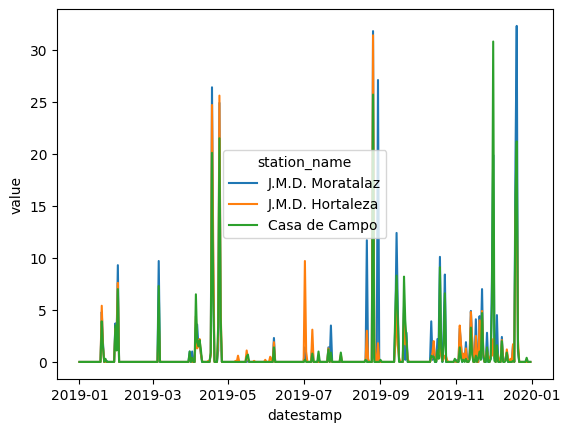

In [8]:
sns.lineplot(data =test, x = 'datestamp', y = 'value', hue= 'station_name')

In [74]:
combined_df

,ESTACION,ANO,MES,MAGNITUD,variable,value,meteor_factor,station_name,datestamp
0,102,2019,01,81,D01,0.66,Wind Speed,J.M.D. Moratalaz,2019-01-01
1,102,2019,02,81,D01,4.32,Wind Speed,J.M.D. Moratalaz,2019-02-01
2,102,2019,03,81,D01,1.57,Wind Speed,J.M.D. Moratalaz,2019-03-01
3,102,2019,04,81,D01,1.32,Wind Speed,J.M.D. Moratalaz,2019-04-01
4,102,2019,05,81,D01,2.06,Wind Speed,J.M.D. Moratalaz,2019-05-01
...,...,...,...,...,...,...,...,...,...
4456,24,2020,05,89,D31,3.40,Precipitation,Casa de Campo,2020-05-31
4458,24,2020,07,89,D31,0.00,Precipitation,Casa de Campo,2020-07-31
4459,24,2020,08,89,D31,0.00,Precipitation,Casa de Campo,2020-08-31
4461,24,2020,10,89,D31,0.00,Precipitation,Casa de Campo,2020-10-31


<AxesSubplot: >

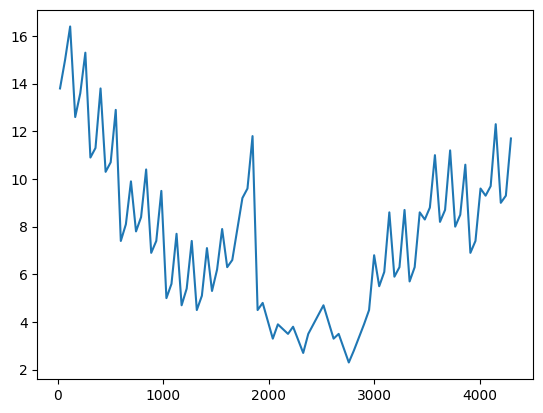

In [21]:
combined_df[(combined_df['ANO'] == 2019) & (combined_df['MES'] == 11) & (combined_df['meteor_factor'] == 'Temperature')]['value'].plot()

In [22]:
combined_df.shape

(11513, 10)

In [24]:
pd.melt(combined_df, id_vars= ['datestamp', 'meteor_factor'] ,value_vars= 'value')

/var/folders/tl/rdcj6pp130g_pdpr6thc58qr0000gn/T/ipykernel_24574/2494297731.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  pd.melt(combined_df, id_vars= ['datestamp', 'meteor_factor'] ,value_vars= 'value')


,datestamp,meteor_factor,variable,value
0,2019-01-01,Wind Speed,value,0.66
1,2019-02-01,Wind Speed,value,4.32
2,2019-03-01,Wind Speed,value,1.57
3,2019-04-01,Wind Speed,value,1.32
4,2019-05-01,Wind Speed,value,2.06
...,...,...,...,...
11508,2020-05-31,Precipitation,value,3.40
11509,2020-07-31,Precipitation,value,0.00
11510,2020-08-31,Precipitation,value,0.00
11511,2020-10-31,Precipitation,value,0.00


In [28]:
pd.melt(combined_df, id_vars= 'datestamp', value_vars = ['meteor_factor','value'])

/var/folders/tl/rdcj6pp130g_pdpr6thc58qr0000gn/T/ipykernel_24574/2310583027.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  pd.melt(combined_df, id_vars= 'datestamp', value_vars = ['meteor_factor','value'])


,datestamp,variable,value
0,2019-01-01,meteor_factor,Wind Speed
1,2019-02-01,meteor_factor,Wind Speed
2,2019-03-01,meteor_factor,Wind Speed
3,2019-04-01,meteor_factor,Wind Speed
4,2019-05-01,meteor_factor,Wind Speed
...,...,...,...
23021,2020-05-31,value,3.4
23022,2020-07-31,value,0.0
23023,2020-08-31,value,0.0
23024,2020-10-31,value,0.0


In [48]:
year = [2019, 2020,2022]
meteo_fac = [81,83,88]
station_name = []

for y in year:
    for m in meteo_fac:
        sth = combined_df[(combined_df['ANO'] == y) & (combined_df['MAGNITUD'] == m)]['datestamp'].unique()
        print(len(sth))

365
365
365
365
365
365
273
273
273


In [9]:
combined_df

,ESTACION,ANO,MES,MAGNITUD,variable,value,sensor_valid,meteor_factor,station_name,datestamp
0,102,2019,01,81,D01,0.66,V,Wind Speed,J.M.D. Moratalaz,2019-01-01
1,102,2019,02,81,D01,4.32,V,Wind Speed,J.M.D. Moratalaz,2019-02-01
2,102,2019,03,81,D01,1.57,V,Wind Speed,J.M.D. Moratalaz,2019-03-01
3,102,2019,04,81,D01,1.32,V,Wind Speed,J.M.D. Moratalaz,2019-04-01
4,102,2019,05,81,D01,2.06,V,Wind Speed,J.M.D. Moratalaz,2019-05-01
...,...,...,...,...,...,...,...,...,...,...
4456,24,2020,05,89,D31,3.40,V,Precipitation,Casa de Campo,2020-05-31
4458,24,2020,07,89,D31,0.00,V,Precipitation,Casa de Campo,2020-07-31
4459,24,2020,08,89,D31,0.00,V,Precipitation,Casa de Campo,2020-08-31
4461,24,2020,10,89,D31,0.00,V,Precipitation,Casa de Campo,2020-10-31


### Aggregate 3 stations of each pollutant values

In [10]:
combined_df.groupby('datestamp').ag

,ESTACION,ANO,MES,MAGNITUD,variable,value,sensor_valid,meteor_factor,station_name,datestamp
0,102,2019,01,81,D01,0.66,V,Wind Speed,J.M.D. Moratalaz,2019-01-01
1,102,2019,02,81,D01,4.32,V,Wind Speed,J.M.D. Moratalaz,2019-02-01
2,102,2019,03,81,D01,1.57,V,Wind Speed,J.M.D. Moratalaz,2019-03-01
3,102,2019,04,81,D01,1.32,V,Wind Speed,J.M.D. Moratalaz,2019-04-01
4,102,2019,05,81,D01,2.06,V,Wind Speed,J.M.D. Moratalaz,2019-05-01
...,...,...,...,...,...,...,...,...,...,...
4456,24,2020,05,89,D31,3.40,V,Precipitation,Casa de Campo,2020-05-31
4458,24,2020,07,89,D31,0.00,V,Precipitation,Casa de Campo,2020-07-31
4459,24,2020,08,89,D31,0.00,V,Precipitation,Casa de Campo,2020-08-31
4461,24,2020,10,89,D31,0.00,V,Precipitation,Casa de Campo,2020-10-31


In [60]:
year = 2019
pollutant  = 81
station_name = combined_df.station_name.unique()

test= combined_df[(combined_df.ANO == year) & (combined_df.MAGNITUD == pollutant)]
new_df = pd.DataFrame()
for station in station_name:
    test= combined_df[(combined_df.ANO == year) & (combined_df.MAGNITUD == pollutant) & (combined_df.station_name == station)]
    if new_df.shape[0] < 1:
        new_df["datestamp"] =test['datestamp']
        new_df[f"{year}_{pollutant}_{station}_datestamp"] =test['datestamp']
        new_df[f"{year}_{pollutant}_{station}_value"] =test['value']
    else:
        print('sh')
        new_new_df = pd.DataFrame()
        new_new_df["datestamp"] =test['datestamp']
        new_new_df[f"{year}_{pollutant}_{station}_value"] =test['value']
        new_df.merge(new_new_df, on= 'datestamp')
        
    print(test.shape)
    print(new_df.shape)

(365, 10)
(365, 3)
sh
(362, 10)
(365, 3)
sh
(358, 10)
(365, 3)


In [61]:
new_df.merge(new_new_df)

,datestamp,2019_81_J.M.D. Moratalaz_datestamp,2019_81_J.M.D. Moratalaz_value,2019_81_Casa de Campo_value
0,2019-01-01,2019-01-01,0.66,0.69
1,2019-02-01,2019-02-01,4.32,4.38
2,2019-03-01,2019-03-01,1.57,1.14
3,2019-04-01,2019-04-01,1.32,1.11
4,2019-05-01,2019-05-01,2.06,1.33
...,...,...,...,...
353,2019-05-31,2019-05-31,1.89,1.40
354,2019-07-31,2019-07-31,3.64,2.37
355,2019-08-31,2019-08-31,1.02,1.03
356,2019-10-31,2019-10-31,2.25,1.78


In [56]:
new_df.merge(new_new_df)['2019_81_Casa de Campo_value']

0      0.69
1      4.38
2      1.14
3      1.11
4      1.33
       ... 
353    1.40
354    2.37
355    1.03
356    1.78
357    0.66
Name: 2019_81_Casa de Campo_value, Length: 358, dtype: float64

In [42]:
new_new_df

,datestamp,2019_81_Casa de Campo_value
96,2019-01-01,0.69
97,2019-02-01,4.38
98,2019-03-01,1.14
99,2019-04-01,1.11
100,2019-05-01,1.33
...,...,...
4420,2019-05-31,1.40
4422,2019-07-31,2.37
4423,2019-08-31,1.03
4425,2019-10-31,1.78


In [43]:
new_df

,datestamp,2019_81_J.M.D. Moratalaz_datestamp,2019_81_J.M.D. Moratalaz_value
0,2019-01-01,2019-01-01,0.66
1,2019-02-01,2019-02-01,4.32
2,2019-03-01,2019-03-01,1.57
3,2019-04-01,2019-04-01,1.32
4,2019-05-01,2019-05-01,2.06
...,...,...,...
4324,2019-05-31,2019-05-31,1.89
4326,2019-07-31,2019-07-31,3.64
4327,2019-08-31,2019-08-31,1.02
4329,2019-10-31,2019-10-31,2.25


In [15]:
for station in station_name:
    print(station)

J.M.D. Moratalaz
J.M.D. Hortaleza
Casa de Campo
